# IT 362 - Princeples of Data Science

Group#3

Students names :

1- Lina Alrabeah 

2- Lina Alshiddi

3- Shekha Alabdulsalam

4- Layan AlTowaijri


# IKEA online website 
# 1.Data collection 

we will collect 9 features for each observation 

- Name : the name of product / (Qualitative )
- Category : the category of the product /(Qualitative)
- Prooduct_type : the product type /(Qualitative)
- Price : the price of the product /(Quantative)
- Review_count : number of reviews for product /(Quantative)
- Badge :is the item one of the top seller or not/ (Qualitative)
- have_Different_options :is the item have other options or not "like different color"/ (Qualitative)
- New_product :is the item new or not / (Qualitative)
- Discount :is the item have new discount /(Qualitative)



In [1]:
import requests
from bs4 import BeautifulSoup 
import csv
import pandas as pd

In [2]:
arrayurlCat = ["childrens-furniture-18767/", "sofas-fu003/", "wardrobes-19053/","furniture-sets-55036/","beds-bm003/",
               "bookcases-shelving-units-st002/","tables-desks-fu004/","cabinets-cupboards-st003/","tv-media-furniture-10475/",
               "chests-of-drawers-drawer-units-st004/","outdoor-furniture-od003/","gaming-furniture-55002/","room-dividers-46080/",
               "chairs-fu002/","sideboards-buffets-console-tables-30454/","trolleys-fu005/","bar-furniture-16244/","armchairs-chaise-longues-fu006/",
              "nursery-furniture-45780/","dining-furniture-700417/"]
url = "https://www.ikea.com/sa/en/cat/"

product_data = []

for urlCat in arrayurlCat:
    #for page in range(2, 5):
    req = requests.get(url + urlCat)
    soup = BeautifulSoup(req.text, "lxml") 
    products = soup.find_all('div', {'class': 'plp-fragment-wrapper'})
    category = soup.find('h1', {'class': 'plp-page-title__title'}).text.strip()

    for i in products:
        name = i.find('span', {'class': 'pip-header-section__title--small notranslate'}).text.strip()
        price = i.find('span', {'class': 'pip-price__integer'}).text.strip()
        badge = i.find('span', {'class': 'pip-commercial-message__title'})
        new_lower = i.find('span', {'class': 'pip-product-highlight pip-product-highlight__nlp-label'})
        new = i.find('span', {'class': 'pip-product-highlight pip-product-highlight__new'})
        option = i.find('h4', {'class': 'plp-product-thumbnails__label'})
        product_type = i.find('span', {'class': 'pip-header-section__description-text'}).text.strip()
        review_count = i.find('span', {'class': 'pip-rating__label'})

        if badge is not None:
            if badge.text.strip()=="Top seller":
                badge_text = badge.text.strip()
               
        else:
                badge_text = "Not top seller"
            
        if new_lower is not None:
                newLowerTag = new_lower.text.strip().replace("\n", " ")
        else:
                newLowerTag="Not have lower price"
                
        if new is not None:
                newTag = new.text.strip()
        else:
                newTag = "Not new"
            
        if option is not None:
                option_text = option.text.strip().split("s")[0]
        else:
                option_text = "No option"
            
        if review_count is not None:
                review_count = int(review_count.text.strip()[1:-1])
        else:
                review_count = 0
        
        product_data.append({
                'name': name,
                'category': category,
                'product_type': product_type,
                'review_count': review_count,
                'price': price,
                'badge': badge_text,
                'option': option_text,
                'newTag': newTag,
                'newLowerTag':newLowerTag
        })

df = pd.concat([pd.DataFrame(product_data) for _ in range(len(arrayurlCat))], ignore_index=True)

In [3]:
df.columns= ["Name" ,"Category", "Product_type" , "Review_count", "Price"  , "Badge" ,  "have_Different_options","New_product","Discount"]
df
df.to_csv('Ikea_dataset_collecting.csv' ,  index=False)


# 2.Data cleaning


In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import preprocessing
import plotly.express as px
ikea = pd.read_csv('Ikea_dataset_collecting.csv')



In [5]:
ikea.head()

,Name,Category,Product_type,Review_count,Price,Badge,have_Different_options,New_product,Discount
0,LÄTT,Children's furniture,Children's table with 2 chairs,17,199,Top seller,No option,Not new,New Lower Price
1,MAMMUT,Children's furniture,"Children's table,",6,189,Not top seller,No option,Not new,Not have lower price
2,MAMMUT,Children's furniture,"Children's table,",0,115,Not top seller,No option,Not new,Not have lower price
3,IKEA PS LÖMSK,Children's furniture,Swivel armchair,1,449,Not top seller,No option,Not new,Not have lower price
4,SMÅSTAD,Children's furniture,"Wardrobe with pull-out unit,",0,"1,223",Not top seller,No option,Not new,Not have lower price


In [6]:
ikea.shape

(9600, 9)

In [7]:
# print type and some information about each column 
ikea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    9600 non-null   object
 1   Category                9600 non-null   object
 2   Product_type            9600 non-null   object
 3   Review_count            9600 non-null   int64 
 4   Price                   9600 non-null   object
 5   Badge                   9600 non-null   object
 6   have_Different_options  9600 non-null   object
 7   New_product             9600 non-null   object
 8   Discount                9600 non-null   object
dtypes: int64(1), object(8)
memory usage: 675.1+ KB


##### We can coclude from the above that :
- The categorical features :
     1-Name
     2-Category 
     3-Product_type
     4-Badge 
     5-have_Diffrent_option
     6-New product 
     7-Discount
     8-Price
- The numerical featues:
     1-Review_count

##### but the Problem here , that the price feature are in number and consider as Quantitative , So we need to convert the type object that we got it from data collecting into int type 

In [8]:
print(ikea['Price'].dtype)
ikea['Price']=ikea['Price'].str.replace(',' , '')
ikea['Price']=ikea['Price'].astype(int)
ikea.info()

object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    9600 non-null   object
 1   Category                9600 non-null   object
 2   Product_type            9600 non-null   object
 3   Review_count            9600 non-null   int64 
 4   Price                   9600 non-null   int64 
 5   Badge                   9600 non-null   object
 6   have_Different_options  9600 non-null   object
 7   New_product             9600 non-null   object
 8   Discount                9600 non-null   object
dtypes: int64(2), object(7)
memory usage: 675.1+ KB


##### first we remove the comma in price to be able to convert it into int type , and then we convert it Successfully 

In [9]:
# number of the mising value for each feature 
ikea_missing = ikea.isnull().sum()
ikea_missing

Name                      0
Category                  0
Product_type              0
Review_count              0
Price                     0
Badge                     0
have_Different_options    0
New_product               0
Discount                  0
dtype: int64

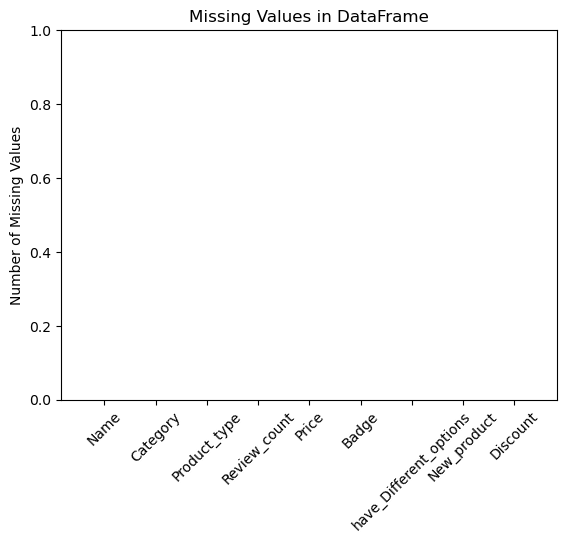

In [10]:
#visulaize: 
plt.bar(ikea_missing.index, ikea_missing.values)
plt.title('Missing Values in DataFrame')
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')
plt.ylim (0 , max(ikea_missing.values)+1)
plt.show()

##### We check the missing value , and there is no missing value 

In [11]:
#check if there is duplicated observation 
sum(ikea.duplicated())

9128

In [12]:
ikea = ikea.drop_duplicates()
ikea.shape

(472, 9)

#### As a process of data cleaning , we check if we have duplicate observation and we get 9128 duplicate and this is possible since there is a lot of product that may be in many category and we scraped this category.

##### At the end we drop this duplicate observations , since we need to raise accuracy , efficiency and quality , and decrease bias 

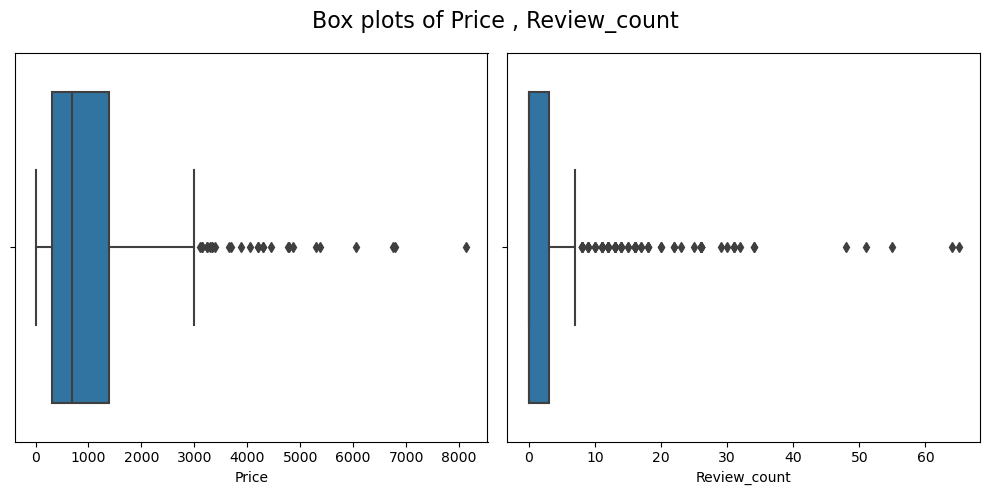

In [14]:
# check for outliers
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create a box plot for the first feature
sns.boxplot(x='Price', data=ikea, ax=axes[0])

# Create a box plot for the second feature
sns.boxplot(x='Review_count', data=ikea, ax=axes[1])

fig.suptitle('Box plots of Price , Review_count', fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()

##### outliers can provide valuable insights into the data and help identify interesting patterns or trends, and sometimes they also give us an explanation or help you elaborate on probabilities or hypotheses.
##### It is normal to contain extreme values in this column, as they are caused by a variety of factors, such as the popularity of this product, whether negatively or positively , and about price we have diffrent category , like outdoor set or only one chair , so it's normal that the outdoor set have high price and this is not an outlier

In [15]:
ikea.to_csv('Ikea_datasetFinal.csv' ,  index=False)